<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/02_binary_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import backend as K
import numpy as np

In [ ]:
#Helper functions


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

### Creating Data
we use sklearn create circles datasets with 1000 samples


In [ ]:
X, y = make_circles(n_samples=1000, random_state=42, noise = 0.03)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

### Visualising our Data

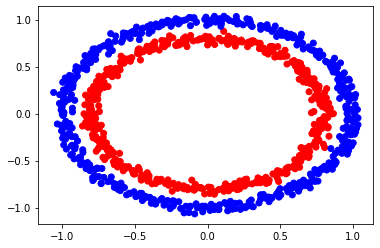

In [ ]:
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X[:,0],X[:,1], c = y, cmap=cmap)
plt.show()

### Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

In [ ]:
K.clear_session()

In [ ]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(2,)),
                              tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(1)
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = tf.keras.losses.BinaryCrossentropy(), 
               metrics= ['accuracy'])

In [ ]:
model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.8364 - accuracy: 0.2812
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7922 - accuracy: 0.2675
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7638 - accuracy: 0.2000
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7386 - accuracy: 0.3375
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7185 - accuracy: 0.4075
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5138
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6225
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7775
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7275
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.8025


In [ ]:
y_pred_1 = model1.predict(X_test)

In [ ]:
y_test[:10], y_pred_1[:10]

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]), array([[0.64251226],
        [0.47927794],
        [0.622224  ],
        [0.336127  ],
        [0.5060216 ],
        [0.41149065],
        [0.3018277 ],
        [0.41431266],
        [0.5676404 ],
        [0.47841218]], dtype=float32))

In [ ]:
# Second model with more layers and epochs
K.clear_session()
tf.random.set_seed(42)

In [ ]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = 2),
                              tf.keras.layers.Dense(10, activation = 'relu'),
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'], loss = tf.keras.losses.BinaryCrossentropy())

In [ ]:
history2 = model2.fit(X_train, y_train, epochs = 50, verbose=0)

In [ ]:
y_pred_2 = model2.predict(X_test)

In [ ]:
y_pred_2[:10].round(), y_test[:10]

(array([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]], dtype=float32), array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [ ]:
model2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9950


[0.012707941234111786, 0.9950000047683716]

### Visualise predictions

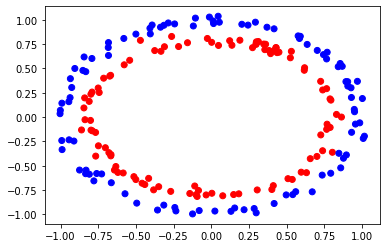

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred_2, cmap=cmap)
plt.show()

doing binary classifcation...


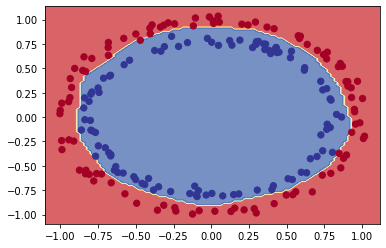

In [ ]:
plot_decision_boundary(model2, X_test, y_test)

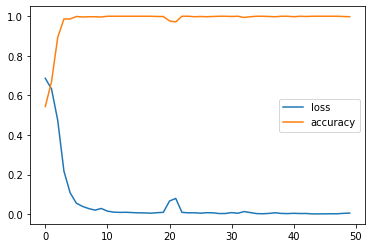

In [ ]:
pd.DataFrame(history2.history).plot()

### Finding the best learning rate
* Learning rate call back function
* Use modified models (i use model from tutorial)
* Compare loss graphs of different models (where the loss decreasing faster

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [ ]:
history3 = model3.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler,])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5100
Epoch 11/

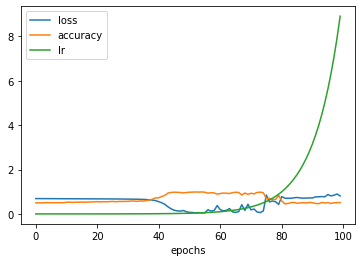

In [ ]:
pd.DataFrame(history3.history).plot(xlabel = 'epochs')

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4*10**(tf.range(100)/20)

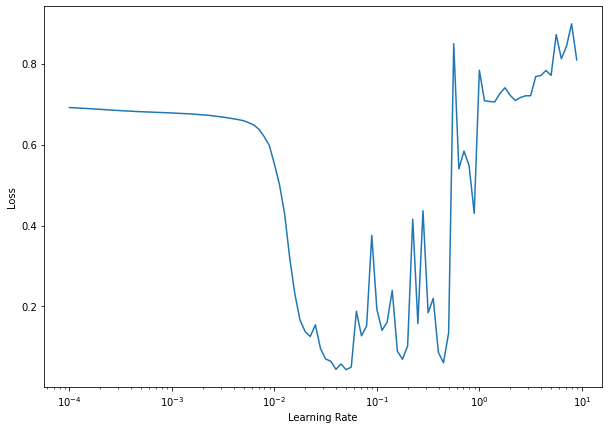

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()

In [ ]:
# We should choose lr still decreasing, but not flatten out or 10 times smaller then the lowest point (0.04), we should choose between 0.01 and 0.02

In [ ]:
tf.random.set_seed(42)
K.clear_session()

In [ ]:
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history4 = model4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/

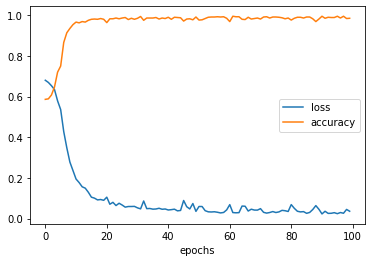

In [ ]:
pd.DataFrame(history4.history).plot(xlabel = 'epochs')

### Classification evaluation Methods
* **Accuracy** when we have balanced classes
tf.keras.metrics.Accuracy() == sklearn.metrics.accuracy_score()
* **Precision** tp/(tp+fp)
less false positive
tf.keras.metrics.Precision() == sklearn.metrics.precision_score()
* **Recall** tp/(tp+fn)
less false negative
tf.keras.metrics.Recall() == sklearn.metrics.recall_score()
* **F-1 score** combination of recall and precision
precision*recall/(precision+recall)
sklearn.metrics.f1_score()
* **Confusion Matrix** Visualisation of results
sklearn.metrics.confusion_matrix()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_4 = model4.predict(X_test)

In [ ]:
confusion_matrix(y_pred_4, y_test)

ValueError: ignored